## Data Science Salaries 2023

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import f_oneway

In [2]:
dt = pd.read_csv('ds_salaries.csv')

In [3]:
dt.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
dt.shape

(3755, 11)

In [5]:
dt.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


## Unique Job Titles

In [6]:
#Calculate unique job titles: 
unique_job_titles = np.unique(dt['job_title'])
total_unique_job_titles = len(unique_job_titles)
print("Total number of unique job titles:", total_unique_job_titles)
column_values = dt['job_title']
unique_values = np.unique(column_values)
print(unique_values)

Total number of unique job titles: 93
['3D Computer Vision Researcher' 'AI Developer' 'AI Programmer'
 'AI Scientist' 'Analytics Engineer' 'Applied Data Scientist'
 'Applied Machine Learning Engineer' 'Applied Machine Learning Scientist'
 'Applied Scientist' 'Autonomous Vehicle Technician' 'Azure Data Engineer'
 'BI Analyst' 'BI Data Analyst' 'BI Data Engineer' 'BI Developer'
 'Big Data Architect' 'Big Data Engineer' 'Business Data Analyst'
 'Business Intelligence Engineer' 'Cloud Data Architect'
 'Cloud Data Engineer' 'Cloud Database Engineer' 'Compliance Data Analyst'
 'Computer Vision Engineer' 'Computer Vision Software Engineer'
 'Data Analyst' 'Data Analytics Consultant' 'Data Analytics Engineer'
 'Data Analytics Lead' 'Data Analytics Manager'
 'Data Analytics Specialist' 'Data Architect' 'Data DevOps Engineer'
 'Data Engineer' 'Data Infrastructure Engineer' 'Data Lead'
 'Data Management Specialist' 'Data Manager' 'Data Modeler'
 'Data Operations Analyst' 'Data Operations Engineer

## Experience Levels

In [7]:
#Calculate # & list types of experience levels 
unique_experience_levels = np.unique(dt['experience_level'])
total_unique_experience_levels = len(unique_experience_levels)
print("Total number of experience levels:", total_unique_experience_levels)
column_values = dt['experience_level']
unique_values = np.unique(column_values)
print(unique_values)

Total number of experience levels: 4
['EN' 'EX' 'MI' 'SE']


## Employee Residences

In [8]:
#Calculate # of employee residences & list employee residences
unique_employee_residences = np.unique(dt['employee_residence'])
total_unique_employee_residences = len(unique_employee_residences)
print("Total number of employee residences:", total_unique_employee_residences)
column_values = dt['employee_residence']
unique_values = np.unique(column_values)
print(unique_values)

Total number of employee residences: 78
['AE' 'AM' 'AR' 'AS' 'AT' 'AU' 'BA' 'BE' 'BG' 'BO' 'BR' 'CA' 'CF' 'CH'
 'CL' 'CN' 'CO' 'CR' 'CY' 'CZ' 'DE' 'DK' 'DO' 'DZ' 'EE' 'EG' 'ES' 'FI'
 'FR' 'GB' 'GH' 'GR' 'HK' 'HN' 'HR' 'HU' 'ID' 'IE' 'IL' 'IN' 'IQ' 'IR'
 'IT' 'JE' 'JP' 'KE' 'KW' 'LT' 'LU' 'LV' 'MA' 'MD' 'MK' 'MT' 'MX' 'MY'
 'NG' 'NL' 'NZ' 'PH' 'PK' 'PL' 'PR' 'PT' 'RO' 'RS' 'RU' 'SE' 'SG' 'SI'
 'SK' 'TH' 'TN' 'TR' 'UA' 'US' 'UZ' 'VN']


## Company Locations

In [9]:
#Calculate # of company locations & list company locations
unique_company_locations = np.unique(dt['company_location'])
total_unique_company_locations = len(unique_company_locations)
print("Total number of company locations:", total_unique_company_locations)
column_values = dt['company_location']
unique_values = np.unique(column_values)
print(unique_values)

Total number of company locations: 72
['AE' 'AL' 'AM' 'AR' 'AS' 'AT' 'AU' 'BA' 'BE' 'BO' 'BR' 'BS' 'CA' 'CF'
 'CH' 'CL' 'CN' 'CO' 'CR' 'CZ' 'DE' 'DK' 'DZ' 'EE' 'EG' 'ES' 'FI' 'FR'
 'GB' 'GH' 'GR' 'HK' 'HN' 'HR' 'HU' 'ID' 'IE' 'IL' 'IN' 'IQ' 'IR' 'IT'
 'JP' 'KE' 'LT' 'LU' 'LV' 'MA' 'MD' 'MK' 'MT' 'MX' 'MY' 'NG' 'NL' 'NZ'
 'PH' 'PK' 'PL' 'PR' 'PT' 'RO' 'RU' 'SE' 'SG' 'SI' 'SK' 'TH' 'TR' 'UA'
 'US' 'VN']


## Average Salary

In [10]:
#Calculate average salary
average_salary = np.mean(dt["salary_in_usd"])
print(f"Average salary: ${average_salary:.2f}")

Average salary: $137570.39


## Average Salary by Work Year

In [11]:
#Calculate average salary based on work_year
average_salary_wy = dt.groupby('work_year')['salary'].mean()
average_salary_year = average_salary_wy.reset_index()
print(average_salary_year)

   work_year         salary
0       2020  386352.750000
1       2021  544163.252174
2       2022  165421.016827
3       2023  160381.480672


## Average Salary based on Experience Level

In [12]:
#Calculate average salary based on experience level
average_salary_e = dt.groupby('experience_level')['salary'].mean()
average_salary_ex = average_salary_e.reset_index()
print(average_salary_ex)

  experience_level         salary
0               EN  188381.178125
1               EX  246802.201754
2               MI  248200.306832
3               SE  170048.965421


## Average Salary based on Employment Type

In [13]:
#Calculate average salary based on employment type
average_salary_et = dt.groupby('employment_type')['salary'].mean()
average_salary_emp = average_salary_et.reset_index()
print(average_salary_emp)

  employment_type         salary
0              CT  113300.000000
1              FL  288755.500000
2              FT  191146.539268
3              PT   79910.823529


## Average Salary based on Job Title

In [14]:
#Calculate average salary based on job title 
average_salary_j = dt.groupby('job_title')['salary'].mean()
average_salary_jt = average_salary_j.reset_index()
print(average_salary_jt)

                        job_title         salary
0   3D Computer Vision Researcher  120000.000000
1                    AI Developer  137181.818182
2                   AI Programmer   55000.000000
3                    AI Scientist  275312.500000
4              Analytics Engineer  151352.621359
..                            ...            ...
88              Research Engineer  162752.810811
89             Research Scientist  160768.890244
90         Software Data Engineer   75000.000000
91             Staff Data Analyst   15000.000000
92           Staff Data Scientist  105000.000000

[93 rows x 2 columns]


## Average Salary based on Employee Residence

In [15]:
#Calculate average salary based on employee residence 
average_salary_er = dt.groupby('employee_residence')['salary'].mean()
average_salary_emres = average_salary_er.reset_index()
print(average_salary_emres)

   employee_residence         salary
0                  AE  100000.000000
1                  AM   50000.000000
2                  AR   35500.000000
3                  AS   32777.500000
4                  AT   65833.333333
..                ...            ...
73                 TR  114600.000000
74                 UA   57850.000000
75                 US  152822.011651
76                 UZ  103000.000000
77                 VN   33466.666667

[78 rows x 2 columns]


## Average Salary based on Company Location

In [16]:
#Calculate average salary based on company location 
average_salary_c = dt.groupby('company_location')['salary'].mean()
average_salary_cl = average_salary_c.reset_index()
print(average_salary_cl)

   company_location         salary
0                AE  100000.000000
1                AL   10000.000000
2                AM   50000.000000
3                AR   25000.000000
4                AS  468333.333333
..              ...            ...
67               TH  618333.333333
68               TR  114600.000000
69               UA   57850.000000
70               US  157665.357566
71               VN   12000.000000

[72 rows x 2 columns]


## Average Salary based on Company Size

In [17]:
#Calculate average salary based on company size 
average_salary_cs = dt.groupby('company_size')['salary'].mean()
average_salary_csize = average_salary_cs.reset_index()
print(average_salary_csize)

  company_size         salary
0            L  438794.372247
1            M  150712.836029
2            S  281430.101351


## Highest Salaries In USD

In [18]:
top_company_locations = dt.sort_values("salary_in_usd", ascending = False)
top_company_locations.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3522,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
2011,2022,MI,FT,Data Analyst,350000,GBP,430967,GB,0,GB,M
528,2023,SE,FT,AI Scientist,1500000,ILS,423834,IL,0,IL,L
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
3675,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S


## Lowest Salaries in USD

In [19]:
bottom_locations = top_company_locations.tail()
bottom_locations = bottom_locations.sort_values('salary_in_usd')
bottom_locations.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2684,2022,MI,FT,NLP Engineer,120000,CZK,5132,CZ,100,CZ,M
3537,2021,MI,PT,3D Computer Vision Researcher,400000,INR,5409,IN,50,IN,M
2578,2021,EN,FT,Power BI Developer,400000,INR,5409,IN,50,IN,L
3667,2021,MI,FT,Data Scientist,420000,INR,5679,IN,100,US,S
3685,2020,EN,FT,Data Science Consultant,423000,INR,5707,IN,50,IN,M


## Summary Statistics

In [20]:
mean = dt['salary'].groupby(dt['work_year']).mean()
median = dt['salary'].groupby(dt['work_year']).median()
var = dt['salary'].groupby(dt['work_year']).var()
std = dt['salary'].groupby(dt['work_year']).std()
sem = dt['salary'].groupby(dt['work_year']).sem()

summary_stats = pd.DataFrame({"Mean Salary by Work Year":mean, 
                            "Median Salary by Work Year":median, 
                           "Salary by Work Year Variance":var, 
                           "Salary by Work Year Std. Dev.":std, 
                           "Salary by Work Year Std. Err.":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stats

,Mean Salary by Work Year,Median Salary by Work Year,Salary by Work Year Variance,Salary by Work Year Std. Dev.,Salary by Work Year Std. Err.
work_year,,,,,
2020,386352.750000,93000.0,1.903639e+12,1.379724e+06,158265.231944
2021,544163.252174,100000.0,5.481034e+12,2.341161e+06,154371.567577
2022,165421.016827,135000.0,1.289907e+11,3.591528e+05,8804.457396
2023,160381.480672,145000.0,2.624696e+10,1.620091e+05,3834.602710


In [21]:
mean = dt['salary'].groupby(dt['experience_level']).mean()
median = dt['salary'].groupby(dt['experience_level']).median()
var = dt['salary'].groupby(dt['experience_level']).var()
std = dt['salary'].groupby(dt['experience_level']).std()
sem = dt['salary'].groupby(dt['experience_level']).sem()

summary_stats = pd.DataFrame({"Mean Salary by Experience Level":mean, 
                            "Median Salary by Experience Level":median, 
                           "Salary by Experience Variance":var, 
                           "Salary by Experience Std. Dev.":std, 
                           "Salary by Experience Std. Err.":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stats

,Mean Salary by Experience Level,Median Salary by Experience Level,Salary by Experience Variance,Salary by Experience Std. Dev.,Salary by Experience Std. Err.
experience_level,,,,,
EN,188381.178125,80000.0,2.798999e+11,5.290557e+05,29575.110797
EX,246802.201754,200000.0,3.005120e+11,5.481897e+05,51342.674099
MI,248200.306832,100000.0,1.696947e+12,1.302669e+06,45913.058357
SE,170048.965421,148000.0,8.028947e+10,2.833540e+05,5649.031206


In [22]:
mean = dt['salary'].groupby(dt['employment_type']).mean()
median = dt['salary'].groupby(dt['employment_type']).median()
var = dt['salary'].groupby(dt['employment_type']).var()
std = dt['salary'].groupby(dt['employment_type']).std()
sem = dt['salary'].groupby(dt['employment_type']).sem()

summary_stats = pd.DataFrame({"Mean Salary by Employment Type":mean, 
                            "Median Salary by Employment Type":median, 
                           "Salary by Employment Type Variance":var, 
                           "Salary by Employment Type Std. Dev.":std, 
                           "Salary by Employment Type Std. Err.":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stats

,Mean Salary by Employment Type,Median Salary by Employment Type,Salary by Employment Type Variance,Salary by Employment Type Std. Dev.,Salary by Employment Type Std. Err.
employment_type,,,,,
CT,113300.000000,75000.0,1.697329e+10,130281.575401,41198.651542
FL,288755.500000,50000.0,5.511024e+11,742362.734803,234755.709201
FT,191146.539268,138900.0,4.541258e+11,673888.538356,11051.809163
PT,79910.823529,50000.0,9.434574e+09,97131.736582,23557.906443


In [23]:
mean = dt['salary'].groupby(dt['employee_residence']).mean()
median = dt['salary'].groupby(dt['employee_residence']).median()
var = dt['salary'].groupby(dt['employee_residence']).var()
std = dt['salary'].groupby(dt['employee_residence']).std()
sem = dt['salary'].groupby(dt['employee_residence']).sem()

summary_stats = pd.DataFrame({"Mean Salary by Employee Residence":mean, 
                            "Median Salary by Employee Residence":median, 
                           "Salary by Employee Residence Variance":var, 
                           "Salary by Employee Residence Std. Dev.":std, 
                           "Salary by Employee Residence Std. Err.":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stats

,Mean Salary by Employee Residence,Median Salary by Employee Residence,Salary by Employee Residence Variance,Salary by Employee Residence Std. Dev.,Salary by Employee Residence Std. Err.
employee_residence,,,,,
AE,100000.000000,115000.0,9.250000e+08,30413.812651,17559.422921
AM,50000.000000,50000.0,NaN,NaN,NaN
AR,35500.000000,39000.0,4.111000e+08,20275.601101,8277.479488
AS,32777.500000,32777.5,3.265290e+08,18070.113793,12777.500000
AT,65833.333333,62000.0,1.925667e+08,13876.839217,5665.195888
...,...,...,...,...,...
TR,114600.000000,108000.0,1.040580e+10,102008.823148,45619.732573
UA,57850.000000,55000.0,1.519023e+09,38974.649881,19487.324940
US,152822.011651,145000.0,3.064662e+09,55359.391222,1010.046438


In [24]:
mean = dt['salary'].groupby(dt['company_location']).mean()
median = dt['salary'].groupby(dt['company_location']).median()
var = dt['salary'].groupby(dt['company_location']).var()
std = dt['salary'].groupby(dt['company_location']).std()
sem = dt['salary'].groupby(dt['company_location']).sem()

summary_stats = pd.DataFrame({"Mean Salary by Company Location":mean, 
                            "Median Salary by Company Location":median, 
                           "Salary by Company Location Variance":var, 
                           "Salary by Company Location Std. Dev.":std, 
                           "Salary by Company Location Std. Err.":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stats

,Mean Salary by Company Location,Median Salary by Company Location,Salary by Company Location Variance,Salary by Company Location Std. Dev.,Salary by Company Location Std. Err.
company_location,,,,,
AE,100000.000000,115000.0,9.250000e+08,30413.812651,17559.422921
AL,10000.000000,10000.0,NaN,NaN,NaN
AM,50000.000000,50000.0,NaN,NaN,NaN
AR,25000.000000,13000.0,4.690000e+08,21656.407828,12503.332889
AS,468333.333333,50000.0,5.635583e+11,750705.223995,433419.863156
...,...,...,...,...,...
TH,618333.333333,840000.0,2.794083e+11,528590.894107,305182.095004
TR,114600.000000,108000.0,1.040580e+10,102008.823148,45619.732573
UA,57850.000000,55000.0,1.519023e+09,38974.649881,19487.324940


In [25]:
mean = dt['salary'].groupby(dt['company_size']).mean()
median = dt['salary'].groupby(dt['company_size']).median()
var = dt['salary'].groupby(dt['company_size']).var()
std = dt['salary'].groupby(dt['company_size']).std()
sem = dt['salary'].groupby(dt['company_size']).sem()

summary_stats = pd.DataFrame({"Mean Salary by Company Size":mean, 
                            "Median Salary by Company Size":median, 
                           "Salary by Company Size Variance":var, 
                           "Salary by Company Size Std. Dev.":std, 
                           "Salary by Company Size Std. Err.":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stats

,Mean Salary by Company Size,Median Salary by Company Size,Salary by Company Size Variance,Salary by Company Size Std. Dev.,Salary by Company Size Std. Err.
company_size,,,,,
L,438794.372247,131300.0,3.167709e+12,1.779806e+06,83530.426510
M,150712.836029,140000.0,2.538391e+10,1.593233e+05,2837.378673
S,281430.101351,73000.0,9.825062e+11,9.912145e+05,81477.330395


## Visualizations 

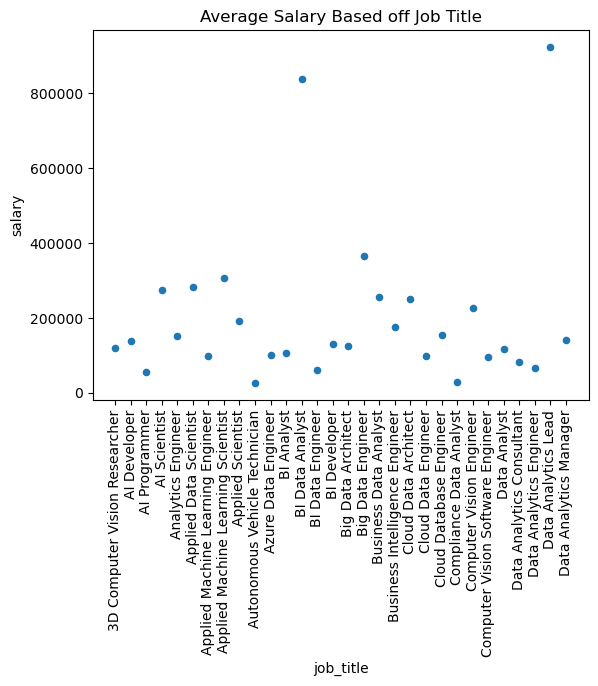

In [26]:
#Display average salary based on job title in a scatter plot
average_salary_jt[0:30].plot.scatter(x = "job_title", y = "salary")
plt.xticks(rotation = 90)
plt.title("Average Salary Based off Job Title")
plt.show()  

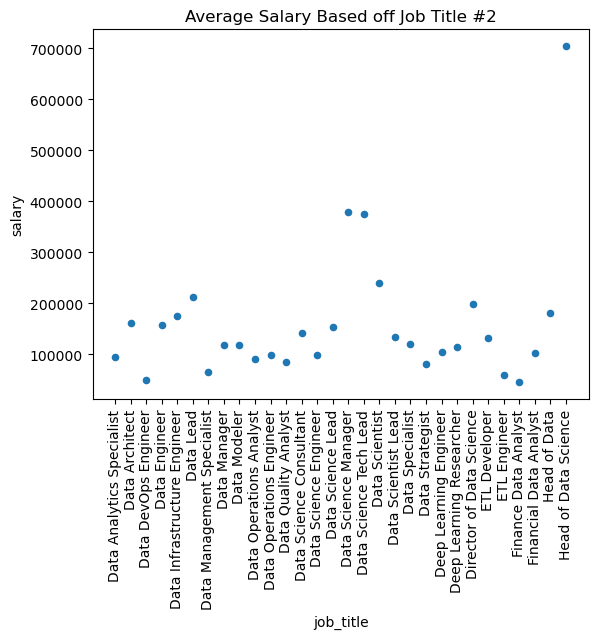

In [27]:
#Display average salary based on job title in a scatter plot #2
average_salary_jt[30:60].plot.scatter(x = "job_title", y = "salary")
plt.xticks(rotation = 90)
plt.title("Average Salary Based off Job Title #2")
plt.show()  

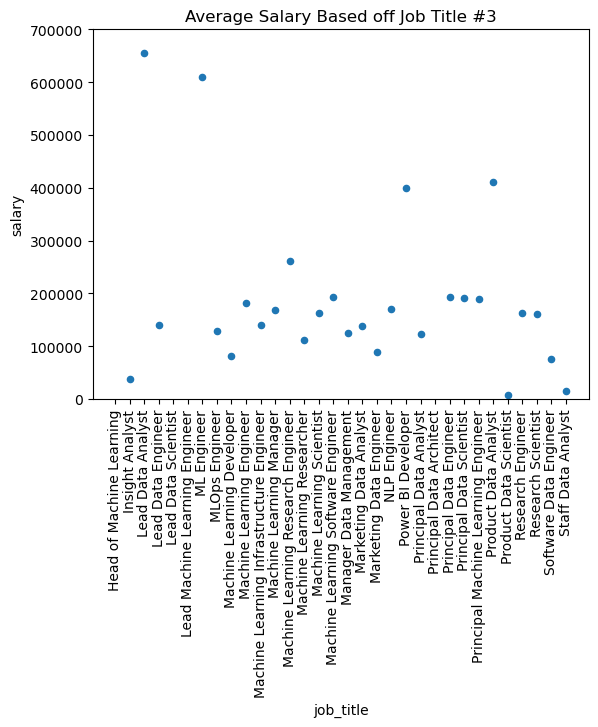

In [28]:
#Display average salary based on job title in a scatter plot #3
average_salary_jt[60:92].plot.scatter(x = "job_title", y = "salary")
plt.xticks(rotation = 90)
plt.title("Average Salary Based off Job Title #3")
plt.ylim([0, 700000])
plt.show()  

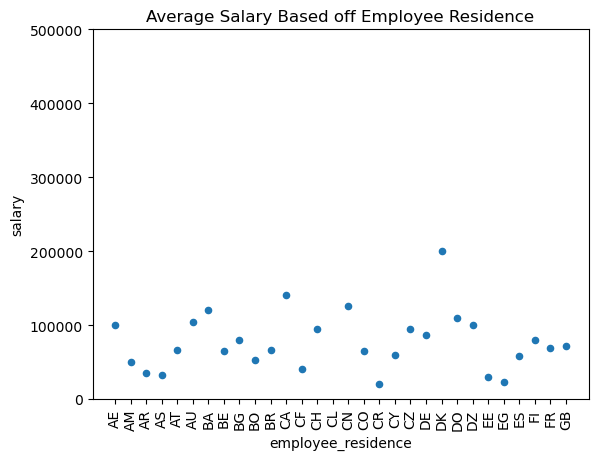

In [29]:
#Display average salary based off employee residence in a scatter plot
average_salary_emres[0:30].plot.scatter(x = "employee_residence", y = "salary")
plt.title("Average Salary Based off Employee Residence")
plt.xticks(rotation = 90)
plt.ylim(0, 500000)
plt.show()  

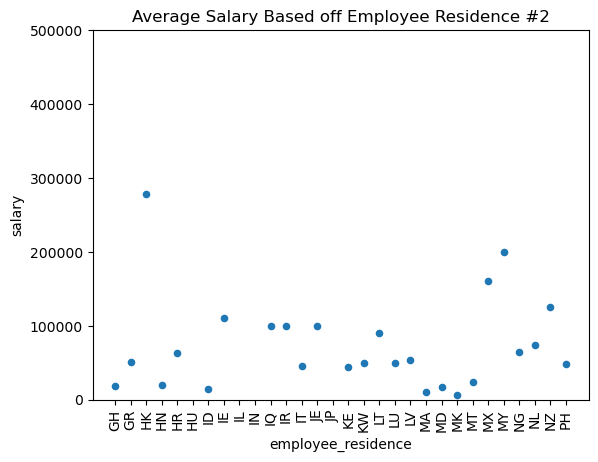

In [30]:
#Display average salary based off employee residence in a scatter plot #2
average_salary_emres[30:60].plot.scatter(x = "employee_residence", y = "salary")
plt.xticks(rotation = 90)
plt.title("Average Salary Based off Employee Residence #2")
plt.ylim(0, 500000)
plt.show()

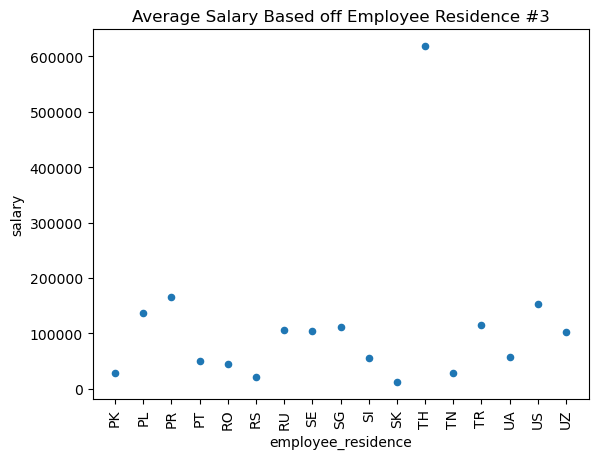

In [31]:
#Display average salary based off employee residence in a scatter plot #3
average_salary_emres[60:77].plot.scatter(x = "employee_residence", y = "salary")
plt.xticks(rotation = 90)
plt.title("Average Salary Based off Employee Residence #3")
plt.show()

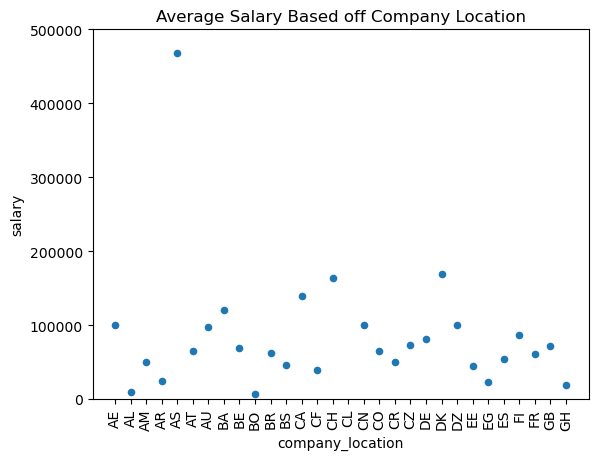

In [32]:
#Display average salary based off company location in a scatter plot
average_salary_cl[0:30].plot.scatter(x = "company_location", y = "salary")
plt.title("Average Salary Based off Company Location")
plt.xticks(rotation = 90)
plt.ylim(0, 500000)
plt.show()  

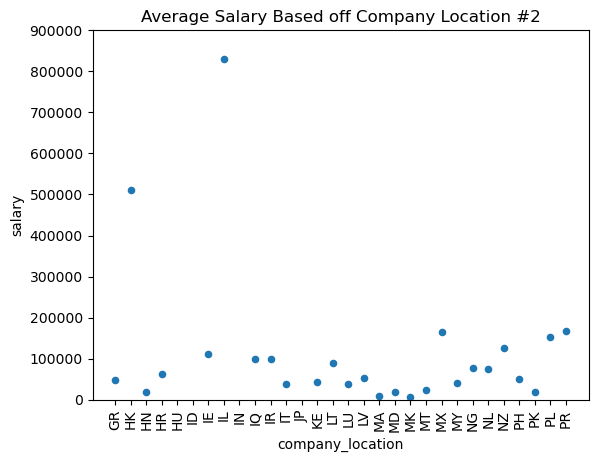

In [33]:
#Display average salary based off company location in a scatter plot #2
average_salary_cl[30:60].plot.scatter(x = "company_location", y = "salary")
plt.title("Average Salary Based off Company Location #2")
plt.xticks(rotation = 90)
plt.ylim(0, 900000)
plt.show()  

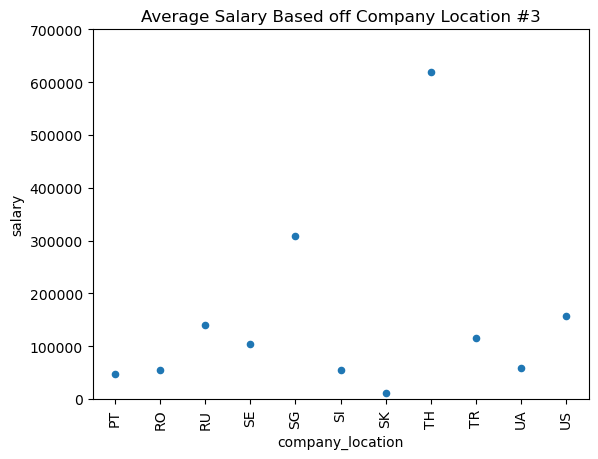

In [34]:
#Display average salary based off company location in a scatter plot #3
average_salary_cl[60:71].plot.scatter(x = "company_location", y = "salary")
plt.title("Average Salary Based off Company Location #3")
plt.xticks(rotation = 90)
plt.ylim(0, 700000)
plt.show()  

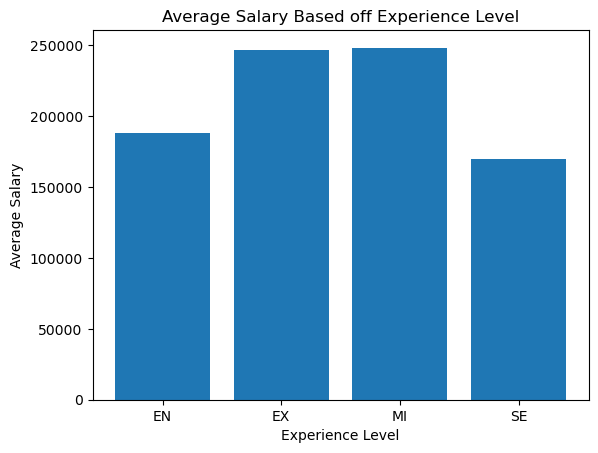

In [35]:
#Display average salary based on experience level in a bar graph
plt.bar(average_salary_ex['experience_level'], average_salary_ex['salary'], color = "tab:blue", align = "center")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary")
plt.xticks = ['EN', 'EX', 'MI', 'SE']
plt.title("Average Salary Based off Experience Level")
plt.show()

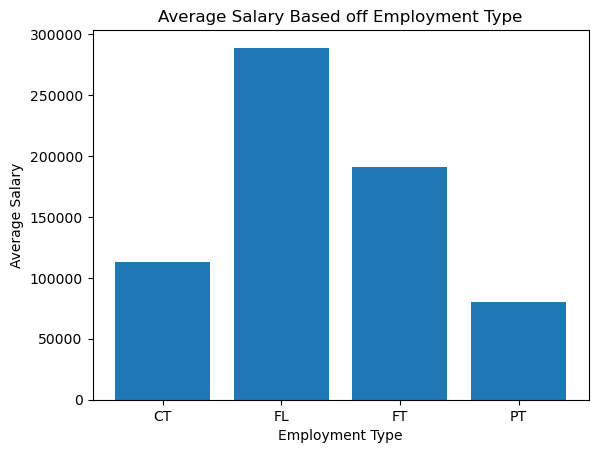

In [36]:
#Display average salary based on experience level in a bar graph
plt.bar(average_salary_emp['employment_type'], average_salary_emp['salary'], color = "tab:blue", align = "center")
plt.xlabel("Employment Type")
plt.ylabel("Average Salary")
plt.xticks = ['CT', 'FL', 'FT', 'PT']
plt.title("Average Salary Based off Employment Type")
plt.show()

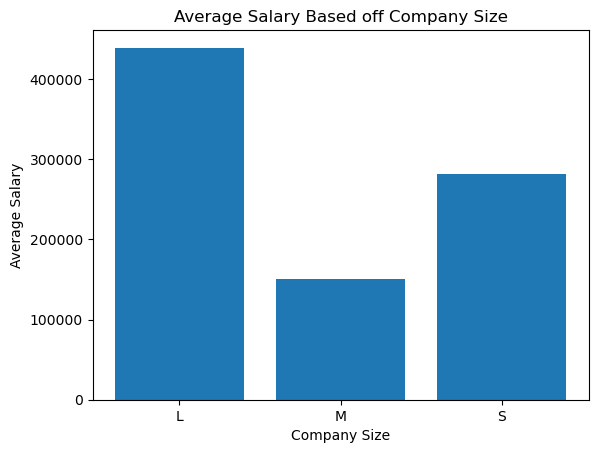

In [37]:
#Display average salary based on company size in a bar graph
plt.bar(average_salary_csize['company_size'], average_salary_csize['salary'], color = "tab:blue", align = "center")
plt.xlabel("Company Size")
plt.ylabel("Average Salary")
plt.xticks = ['L', 'M', 'S',]
plt.title("Average Salary Based off Company Size")
plt.show()

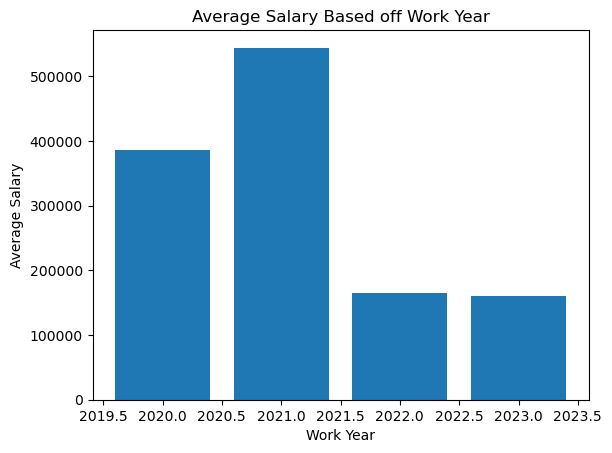

In [38]:
#Display average salary based on work year in a bar graph
plt.bar(average_salary_year['work_year'], average_salary_year['salary'], color = "tab:blue", align = "center")
plt.xlabel("Work Year")
plt.ylabel("Average Salary")
plt.xticks = ['2020', '2021', '2021', '2023']
plt.title("Average Salary Based off Work Year")
plt.show()

## ANOVA Test

## By Work Year

In [39]:
stat, p = f_oneway(average_salary_year.salary, average_salary_year.work_year)

In [40]:
print(p)

0.015344936640208568


In [41]:
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

Probably different distributions


## By Experience Level

In [42]:
average_salary_ex["experience_level"] = average_salary_ex["experience_level"].map({"EN": 1, "MI": 2, "SE": 3, "EX": 4})
stat, p = f_oneway(average_salary_ex.salary, average_salary_ex.experience_level)

In [43]:
print(p)

4.0787388268269865e-05


In [44]:
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

Probably different distributions


## By Employment Type

In [45]:
average_salary_emp["employment_type"] = average_salary_emp["employment_type"].map({"PT": 1, "CT": 2, "FT": 3, "FL": 4})
stat, p = f_oneway(average_salary_emp.salary, average_salary_emp.employment_type)

In [46]:
print(p)

0.011040526386662409


In [47]:
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

Probably different distributions


## By Company Size

In [48]:
average_salary_csize["company_size"] = average_salary_csize["company_size"].map({"S": 1, "M": 2, "L": 3})
stat, p = f_oneway(average_salary_csize.salary, average_salary_csize.company_size)

In [49]:
print(p)

0.025215667495040266


In [50]:
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

Probably different distributions


## Analysis

## Based on our findings, we can conclude that employees with Middle to Executive experience levels earn the highest salaries, as proven by average salary per experience level.

## There is a steep decrease in average salary from 2021 to 2022, with 2021 reporting the highest average salaries while 2023 is seeing some of the lowest.

## Employment type also effects average salary, with freelance (FL) and full-time (FT) employees leading with the highest salaries as opposed to part-time (PT) and contract (CT) employees.


## Average salary varies significantly in relationship to job title, as is visualized on scatter plots 1, 2, 3.

## BI Data Analyst (see "Average Salary Based on Job Title 1") & Data Analytics Lead are the most profitable job positions on average, sitting much higher than the cluster of average salary points aggregated towards the centre of the plot.

## Further outliers can be noted on the second scatter plot (see "Average Salary Based on Job Title 2"), such as Data Science Manager, Data Science Tech Lead & Head of Data Science.

## "Average Salary Based on Job Title 3" likewise presents several outliers which defy the general pattern of aggregation, such as Lead Data Analyst and ML Engineer, as well as less drastic outliers, i.e., Power BI Developer and Product Data Analyst.

## Both Employee Residence & Company Location have a significant impact on overall salary. Highest Salaries measured in US dollars are reported in the Unites States of America (US), Great Britain (GB) and Israel (IL), with 3/5 highest reported salaries coming from US-based companies.

## Lowest salaries are reported in Czechia (CZ) and India (IN), with one exception of a US-based company but in relation to an employee residence in India, suggesting lower salary paid out, likely due to outsourcing labour to cut costs.

## Company Size is another factor that displays an interesting and not entirely proportional relationship to average salary, as we can see that large and small companies, on average, pay their employees higher wages than mid-sized companies. This makes sense considering larger companies and corporations employ greater numbers of professionals & operate on international levels, incurring larger costs. Smaller companies have fewer employees to pay out and retain, and are forced to distribute income more competitively so as not lose employees to bigger, more widely-known companies.

## The ANOVA Test allows us to reject our hypothesis and accept the null because the p-score is lower than 0.05. However, as proven by Summary Statistics & our data visualizations, we can conclude that while the p-score does not reveal a clear statistical relationship between salary and experience/employment type/company size for us to explain salary growth as depending on the aforementioned factors alone, based on our calculations and visualizations we can still summarize that each category impacts salary significantly.

## We can conclude that the best-paying companies are US, GB and IL, with the exception of outsorcing in such instances when the employee residence differs from company location. Your odds at a high salary are also dependent on company size, and in certain instances, experience level (though not limited by it).

## Some limitations of this dataset are its acceptance of a null hypothesis, lack of company names to relate to real-world scenarios & entice potential clients during the job-search process, as well as a timing constraint of only 4 years of data. While we can see varying degrees of impact on salary based on a number of factors, we are limited to finding an absolute positive relationship that proves our initial hypothesis using the ANOVA Test, despite other statistical findings.